
Análisis Histórico (2000-2023):

Estadísticas Descriptivas:
                      Date  DE_Debt  US_Debt  DE_Growth  US_Growth  \
count                   24    24.00    24.00      24.00      24.00   
mean   2011-07-02 18:00:00    67.56    89.25       1.20       2.03   
min    2000-01-01 00:00:00    57.70    54.90      -5.60      -3.10   
25%    2005-10-01 18:00:00    63.50    61.92       0.40       1.68   
50%    2011-07-02 12:00:00    66.30    97.65       1.40       2.35   
75%    2017-04-02 06:00:00    71.25   104.28       2.65       2.75   
max    2023-01-01 00:00:00    80.90   128.10       4.20       5.90   
std                    NaN     6.77    24.88       2.32       1.87   

       DE_Inflation  US_Inflation  DE_Interest  US_Interest  
count         24.00         24.00        24.00        24.00  
mean           2.01          2.56         2.47         3.31  
min            0.20         -0.30         0.40         1.60  
25%            1.08          1.60         1.12         2.40 

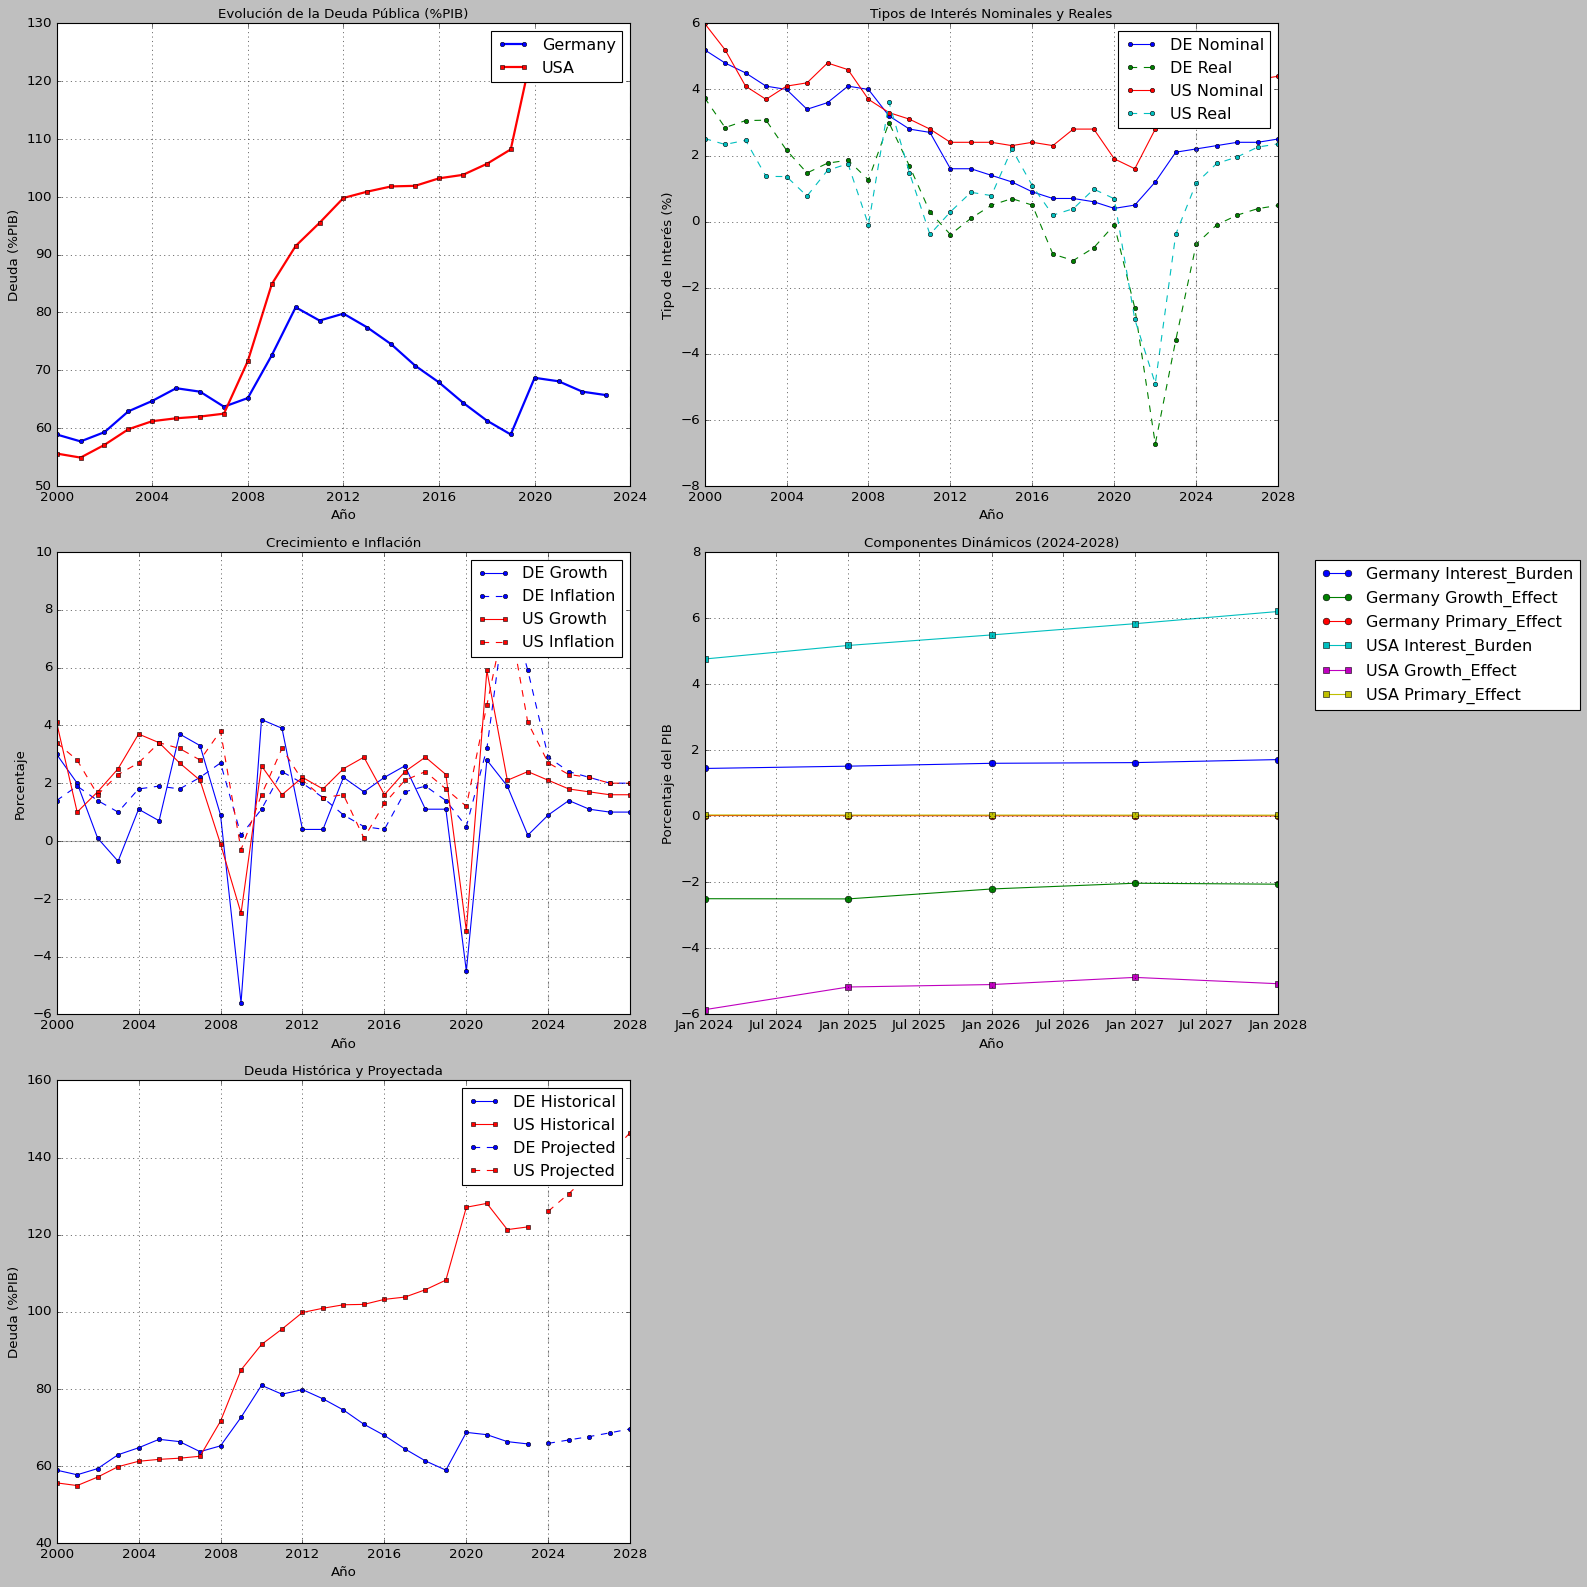

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from typing import Dict, List
import warnings
warnings.filterwarnings('ignore')

# Datos históricos (2000-2023)
historical_germany = {
    '2000': {'growth': 0.030, 'inflation': 0.014, 'interest': 0.052, 'deficit': -0.012, 'debt': 58.9},
    '2001': {'growth': 0.020, 'inflation': 0.019, 'interest': 0.048, 'deficit': -0.016, 'debt': 57.7},
    '2002': {'growth': 0.001, 'inflation': 0.014, 'interest': 0.045, 'deficit': -0.037, 'debt': 59.3},
    '2003': {'growth': -0.007, 'inflation': 0.010, 'interest': 0.041, 'deficit': -0.038, 'debt': 62.9},
    '2004': {'growth': 0.011, 'inflation': 0.018, 'interest': 0.040, 'deficit': -0.033, 'debt': 64.7},
    '2005': {'growth': 0.007, 'inflation': 0.019, 'interest': 0.034, 'deficit': -0.031, 'debt': 66.9},
    '2006': {'growth': 0.037, 'inflation': 0.018, 'interest': 0.036, 'deficit': -0.016, 'debt': 66.3},
    '2007': {'growth': 0.033, 'inflation': 0.022, 'interest': 0.041, 'deficit': 0.002, 'debt': 63.7},
    '2008': {'growth': 0.009, 'inflation': 0.027, 'interest': 0.040, 'deficit': -0.002, 'debt': 65.2},
    '2009': {'growth': -0.056, 'inflation': 0.002, 'interest': 0.032, 'deficit': -0.030, 'debt': 72.6},
    '2010': {'growth': 0.042, 'inflation': 0.011, 'interest': 0.028, 'deficit': -0.042, 'debt': 80.9},
    '2011': {'growth': 0.039, 'inflation': 0.024, 'interest': 0.027, 'deficit': -0.010, 'debt': 78.6},
    '2012': {'growth': 0.004, 'inflation': 0.020, 'interest': 0.016, 'deficit': -0.001, 'debt': 79.8},
    '2013': {'growth': 0.004, 'inflation': 0.015, 'interest': 0.016, 'deficit': -0.001, 'debt': 77.4},
    '2014': {'growth': 0.022, 'inflation': 0.009, 'interest': 0.014, 'deficit': 0.006, 'debt': 74.5},
    '2015': {'growth': 0.017, 'inflation': 0.005, 'interest': 0.012, 'deficit': 0.009, 'debt': 70.8},
    '2016': {'growth': 0.022, 'inflation': 0.004, 'interest': 0.009, 'deficit': 0.012, 'debt': 67.9},
    '2017': {'growth': 0.026, 'inflation': 0.017, 'interest': 0.007, 'deficit': 0.013, 'debt': 64.4},
    '2018': {'growth': 0.011, 'inflation': 0.019, 'interest': 0.007, 'deficit': 0.019, 'debt': 61.3},
    '2019': {'growth': 0.011, 'inflation': 0.014, 'interest': 0.006, 'deficit': 0.016, 'debt': 58.9},
    '2020': {'growth': -0.045, 'inflation': 0.005, 'interest': 0.004, 'deficit': -0.042, 'debt': 68.7},
    '2021': {'growth': 0.028, 'inflation': 0.032, 'interest': 0.005, 'deficit': -0.029, 'debt': 68.1},
    '2022': {'growth': 0.019, 'inflation': 0.085, 'interest': 0.012, 'deficit': -0.022, 'debt': 66.3},
    '2023': {'growth': 0.002, 'inflation': 0.059, 'interest': 0.021, 'deficit': -0.023, 'debt': 65.7},
}

historical_us = {
    '2000': {'growth': 0.041, 'inflation': 0.034, 'interest': 0.060, 'deficit': 0.015, 'debt': 55.6},
    '2001': {'growth': 0.010, 'inflation': 0.028, 'interest': 0.052, 'deficit': -0.003, 'debt': 54.9},
    '2002': {'growth': 0.017, 'inflation': 0.016, 'interest': 0.041, 'deficit': -0.037, 'debt': 57.1},
    '2003': {'growth': 0.025, 'inflation': 0.023, 'interest': 0.037, 'deficit': -0.036, 'debt': 59.8},
    '2004': {'growth': 0.037, 'inflation': 0.027, 'interest': 0.041, 'deficit': -0.034, 'debt': 61.2},
    '2005': {'growth': 0.034, 'inflation': 0.034, 'interest': 0.042, 'deficit': -0.025, 'debt': 61.7},
    '2006': {'growth': 0.027, 'inflation': 0.032, 'interest': 0.048, 'deficit': -0.020, 'debt': 62.0},
    '2007': {'growth': 0.021, 'inflation': 0.028, 'interest': 0.046, 'deficit': -0.016, 'debt': 62.5},
    '2008': {'growth': -0.001, 'inflation': 0.038, 'interest': 0.037, 'deficit': -0.045, 'debt': 71.6},
    '2009': {'growth': -0.025, 'inflation': -0.003, 'interest': 0.033, 'deficit': -0.099, 'debt': 84.9},
    '2010': {'growth': 0.026, 'inflation': 0.016, 'interest': 0.031, 'deficit': -0.088, 'debt': 91.5},
    '2011': {'growth': 0.016, 'inflation': 0.032, 'interest': 0.028, 'deficit': -0.076, 'debt': 95.5},
    '2012': {'growth': 0.022, 'inflation': 0.021, 'interest': 0.024, 'deficit': -0.068, 'debt': 99.8},
    '2013': {'growth': 0.018, 'inflation': 0.015, 'interest': 0.024, 'deficit': -0.044, 'debt': 100.9},
    '2014': {'growth': 0.025, 'inflation': 0.016, 'interest': 0.024, 'deficit': -0.041, 'debt': 101.8},
    '2015': {'growth': 0.029, 'inflation': 0.001, 'interest': 0.023, 'deficit': -0.034, 'debt': 101.9},
    '2016': {'growth': 0.016, 'inflation': 0.013, 'interest': 0.024, 'deficit': -0.033, 'debt': 103.2},
    '2017': {'growth': 0.024, 'inflation': 0.021, 'interest': 0.023, 'deficit': -0.034, 'debt': 103.8},
    '2018': {'growth': 0.029, 'inflation': 0.024, 'interest': 0.028, 'deficit': -0.042, 'debt': 105.7},
    '2019': {'growth': 0.023, 'inflation': 0.018, 'interest': 0.028, 'deficit': -0.047, 'debt': 108.2},
    '2020': {'growth': -0.031, 'inflation': 0.012, 'interest': 0.019, 'deficit': -0.149, 'debt': 127.1},
    '2021': {'growth': 0.059, 'inflation': 0.047, 'interest': 0.016, 'deficit': -0.118, 'debt': 128.1},
    '2022': {'growth': 0.021, 'inflation': 0.081, 'interest': 0.028, 'deficit': -0.055, 'debt': 121.3},
    '2023': {'growth': 0.024, 'inflation': 0.041, 'interest': 0.037, 'deficit': -0.038, 'debt': 122.0},
}

# Proyecciones futuras (2024-2028)
germany_projections = {
    '2024': {'growth': 0.009, 'inflation': 0.029, 'interest': 0.022, 'deficit': 0.021},
    '2025': {'growth': 0.014, 'inflation': 0.024, 'interest': 0.023, 'deficit': 0.018},
    '2026': {'growth': 0.011, 'inflation': 0.022, 'interest': 0.024, 'deficit': 0.015},
    '2027': {'growth': 0.010, 'inflation': 0.020, 'interest': 0.024, 'deficit': 0.012},
    '2028': {'growth': 0.010, 'inflation': 0.020, 'interest': 0.025, 'deficit': 0.010}
}

us_projections = {
    '2024': {'growth': 0.021, 'inflation': 0.027, 'interest': 0.039, 'deficit': 0.037},
    '2025': {'growth': 0.018, 'inflation': 0.023, 'interest': 0.041, 'deficit': 0.035},
    '2026': {'growth': 0.017, 'inflation': 0.022, 'interest': 0.042, 'deficit': 0.034},
    '2027': {'growth': 0.016, 'inflation': 0.020, 'interest': 0.043, 'deficit': 0.033},
    '2028': {'growth': 0.016, 'inflation': 0.020, 'interest': 0.044, 'deficit': 0.032}
}

def calculate_real_interest_rate(nominal: float, inflation: float) -> float:
    """Calcula el tipo de interés real neto según la fórmula ((1+n)/(1+i)) - 1"""
    return ((1 + nominal)/(1 + inflation)) - 1

def calculate_dynamic_debt_dynamics(
    initial_debt_ratio: float,
    projections: Dict,
    years: List[str]
) -> Dict[str, List[float]]:
    """
    Calcula la evolución de la deuda usando proyecciones dinámicas anuales.
    """
    debt_ratio = [initial_debt_ratio]
    interest_burden = []
    growth_effect = []
    primary_effect = []

    for year in years:
        proj = projections[year]
        prev_debt = debt_ratio[-1]

        # Efectos individuales con datos proyectados
        interest_effect = (proj['interest'] * prev_debt)
        growth_impact = -((proj['growth'] + proj['inflation']) * prev_debt)

        interest_burden.append(interest_effect)
        growth_effect.append(growth_impact)
        primary_effect.append(proj['deficit'])

        # Nueva ratio de deuda con parámetros dinámicos
        new_debt = prev_debt * (1 + proj['interest'] - proj['inflation'] + proj['growth']) + proj['deficit']
        debt_ratio.append(new_debt)

    return {
        'debt_ratio': debt_ratio,
        'interest_burden': interest_burden,
        'growth_effect': growth_effect,
        'primary_effect': primary_effect
    }

def merge_historical_and_projections(historical: Dict, projections: Dict) -> Dict:
    """Combina datos históricos con proyecciones"""
    merged = historical.copy()
    for year, data in projections.items():
        merged[year] = data
        if year in historical:
            merged[year]['debt'] = historical[year]['debt']
    return merged

# Configuración inicial
projection_years = ['2024', '2025', '2026', '2027', '2028']
all_years = sorted(list(set(list(historical_germany.keys()) + list(germany_projections.keys()))))
dates = [datetime(int(year), 1, 1) for year in all_years]

# Combinar datos históricos y proyecciones
germany_data = merge_historical_and_projections(historical_germany, germany_projections)
us_data = merge_historical_and_projections(historical_us, us_projections)

# Calcular tipos reales y dinámicas de deuda para las proyecciones
for year in all_years:
    if year in germany_data:
        germany_data[year]['real_rate'] = calculate_real_interest_rate(
            germany_data[year]['interest'],
            germany_data[year]['inflation']
        )
    if year in us_data:
        us_data[year]['real_rate'] = calculate_real_interest_rate(
            us_data[year]['interest'],
            us_data[year]['inflation']
        )

# Calcular dinámicas de deuda para proyecciones
germany_dynamics = calculate_dynamic_debt_dynamics(65.7, germany_projections, projection_years)
us_dynamics = calculate_dynamic_debt_dynamics(122.0, us_projections, projection_years)

# Crear DataFrames
df_historical = pd.DataFrame({
    'Year': all_years,
    'Date': dates,
    'DE_Debt': [germany_data[year].get('debt', None) for year in all_years],
    'US_Debt': [us_data[year].get('debt', None) for year in all_years],
    'DE_Growth': [germany_data[year].get('growth', None)*100 for year in all_years],
    'US_Growth': [us_data[year].get('growth', None)*100 for year in all_years],
    'DE_Inflation': [germany_data[year].get('inflation', None)*100 for year in all_years],
    'US_Inflation': [us_data[year].get('inflation', None)*100 for year in all_years],
    'DE_Interest': [germany_data[year].get('interest', None)*100 for year in all_years],
    'US_Interest': [us_data[year].get('interest', None)*100 for year in all_years],
})

df_germany_dynamics = pd.DataFrame({
    'Date': [datetime(int(year), 1, 1) for year in projection_years],
    'Year': projection_years,
    'Debt_Ratio': germany_dynamics['debt_ratio'][1:],
    'Interest_Burden': germany_dynamics['interest_burden'],
    'Growth_Effect': germany_dynamics['growth_effect'],
    'Primary_Effect': germany_dynamics['primary_effect'],
    'Country': 'Germany'
})

df_us_dynamics = pd.DataFrame({
    'Date': [datetime(int(year), 1, 1) for year in projection_years],
    'Year': projection_years,
    'Debt_Ratio': us_dynamics['debt_ratio'][1:],
    'Interest_Burden': us_dynamics['interest_burden'],
    'Growth_Effect': us_dynamics['growth_effect'],
    'Primary_Effect': us_dynamics['primary_effect'],
    'Country': 'USA'
})

df_dynamics = pd.concat([df_germany_dynamics, df_us_dynamics])

# Configurar gráficos
plt.style.use('classic')
fig = plt.figure(figsize=(20, 20))

# 1. Evolución de la Ratio de Deuda
ax1 = plt.subplot(321)
ax1.plot(df_historical['Date'], df_historical['DE_Debt'], '-bo', linewidth=2, label='Germany', markersize=4)
ax1.plot(df_historical['Date'], df_historical['US_Debt'], '-rs', linewidth=2, label='USA', markersize=4)
ax1.axvline(x=datetime(2024, 1, 1), color='gray', linestyle='--', alpha=0.5)
ax1.set_title('Evolución de la Deuda Pública (%PIB)', fontsize=12)
ax1.legend()
ax1.grid(True)
ax1.set_xlabel('Año')
ax1.set_ylabel('Deuda (%PIB)')

# 2. Tipos de Interés Nominales y Reales
ax2 = plt.subplot(322)
for country, data in [('DE', germany_data), ('US', us_data)]:
    nominal = [data[year]['interest']*100 for year in all_years]
    real = [data[year]['real_rate']*100 for year in all_years]
    ax2.plot(dates, nominal, '-o', label=f'{country} Nominal', markersize=4)
    ax2.plot(dates, real, '--o', label=f'{country} Real', markersize=4)
ax2.axvline(x=datetime(2024, 1, 1), color='gray', linestyle='--', alpha=0.5)
ax2.set_title('Tipos de Interés Nominales y Reales', fontsize=12)
ax2.legend()
ax2.grid(True)
ax2.set_xlabel('Año')
ax2.set_ylabel('Tipo de Interés (%)')

# 3. Crecimiento e Inflación
ax3 = plt.subplot(323)
ax3.plot(df_historical['Date'], df_historical['DE_Growth'], '-bo', label='DE Growth', markersize=4)
ax3.plot(df_historical['Date'], df_historical['DE_Inflation'], '--bo', label='DE Inflation', markersize=4)
ax3.plot(df_historical['Date'], df_historical['US_Growth'], '-rs', label='US Growth', markersize=4)
ax3.plot(df_historical['Date'], df_historical['US_Inflation'], '--rs', label='US Inflation', markersize=4)
ax3.axvline(x=datetime(2024, 1, 1), color='gray', linestyle='--', alpha=0.5)
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.set_title('Crecimiento e Inflación', fontsize=12)
ax3.legend()
ax3.grid(True)
ax3.set_xlabel('Año')
ax3.set_ylabel('Porcentaje')

# 4. Componentes Dinámicos (Proyecciones)
ax4 = plt.subplot(324)
for country in ['Germany', 'USA']:
    country_data = df_dynamics[df_dynamics['Country'] == country]
    for component in ['Interest_Burden', 'Growth_Effect', 'Primary_Effect']:
        ax4.plot(country_data['Date'], country_data[component],
                 '-o' if country == 'Germany' else '-s',
                 label=f'{country} {component}')
ax4.set_title('Componentes Dinámicos (2024-2028)', fontsize=12)
ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax4.grid(True)
ax4.set_xlabel('Año')
ax4.set_ylabel('Porcentaje del PIB')

# 5. Deuda Real vs Proyectada
ax5 = plt.subplot(325)
# Datos históricos
ax5.plot(df_historical['Date'], df_historical['DE_Debt'], '-bo', label='DE Historical', markersize=4)
ax5.plot(df_historical['Date'], df_historical['US_Debt'], '-rs', label='US Historical', markersize=4)
# Proyecciones
ax5.plot(df_germany_dynamics['Date'], df_germany_dynamics['Debt_Ratio'], '--bo', label='DE Projected', markersize=4)
ax5.plot(df_us_dynamics['Date'], df_us_dynamics['Debt_Ratio'], '--rs', label='US Projected', markersize=4)
ax5.axvline(x=datetime(2024, 1, 1), color='gray', linestyle='--', alpha=0.5)
ax5.set_title('Deuda Histórica y Proyectada', fontsize=12)
ax5.legend()
ax5.grid(True)
ax5.set_xlabel('Año')
ax5.set_ylabel('Deuda (%PIB)')

plt.tight_layout()

# Imprimir resultados
print("\nAnálisis Histórico (2000-2023):")
historical_period = df_historical[df_historical['Date'] < datetime(2024, 1, 1)]
print("\nEstadísticas Descriptivas:")
print(historical_period.describe().round(2))

print("\nProyecciones Dinámicas (2024-2028):")
print("\nAlemania:")
print(df_germany_dynamics.round(2))
print("\nEstados Unidos:")
print(df_us_dynamics.round(2))

# Análisis de impactos acumulados
print("\nImpactos Acumulados 2024-2028 (%PIB):")
impactos = pd.DataFrame({
    'Métrica': [
        'Cambio Total en Deuda',
        'Efecto de Intereses',
        'Efecto del Crecimiento',
        'Efecto del Déficit'
    ],
    'Alemania': [
        round(df_germany_dynamics['Debt_Ratio'].iloc[-1] - 65.7, 1),
        round(df_germany_dynamics['Interest_Burden'].sum(), 1),
        round(df_germany_dynamics['Growth_Effect'].sum(), 1),
        round(df_germany_dynamics['Primary_Effect'].sum(), 1)
    ],
    'Estados Unidos': [
        round(df_us_dynamics['Debt_Ratio'].iloc[-1] - 122.0, 1),
        round(df_us_dynamics['Interest_Burden'].sum(), 1),
        round(df_us_dynamics['Growth_Effect'].sum(), 1),
        round(df_us_dynamics['Primary_Effect'].sum(), 1)
    ]
})

print(impactos.to_string(index=False))

plt.show()